# Assignment: Trees
Do three questions.

**Q1.** Please answer the following questions in your own words.

1. How are trees constructed?


Starting from the root node, the algorithm searches for the best feature and threshold to split the data into two subsets. The "best" split minimizes a loss function. This process continues recursively on each child node. Splitting stops when a stopping criterion is met.


2. How do trees handle non-linear relationships between variables? Compare this to linear models.

Trees handle non-linear relationships very well because they make splits based on thresholds in the data, not assumptions of linearity. This allows them to capture complex interactions and model discontinuities and sharp changes. Linear models, on the other hand, assume a linear relationship between predictors and the target. They struggle with non-linear patterns unless features are manually transformed (polynomials, interactions).

 

3. Why is the Gini a good loss function for categorical target variables? 


The Gini index measures how often a randomly chosen element would be incorrectly classified if it were randomly labeled based on the distribution of labels in a node. It’s a good choice because it is sensitive to node purity, it is computationally efficient and differentiable, and it helps guide the tree to make splits that improve class separation.


4. Why do trees tend to overfit, and how can this tendency be constrained? 


Trees tend to overfit because they can keep splitting until every data point is in its own leaf and model noise and outliers as if they were signal. This tendency can be constrained by setting the maximum depth of the tree, setting a minimum number of samples per leaf, using pruning and using ensemble methods like Random Forest or Gradient Boosted Trees to average out overfitting.


5. True or false, and explain: Trees only really perform well in situations with lots of categorical variables as features/covariates. 


False. Trees handle both categorical and continuous variables well. For categorical variables, trees can split on each category or combinations, and for continuous variables, they find threshold splits.


6. Why don't most versions of classification/regression tree concept allow for more than two branches after a split?


Most implementations use binary splits for simplicity (easier to implement and interpret), efficiency (searching over all possible multi-way splits is computationally expensive), and flexibility (a series of binary splits can approximate a multi-way split if needed).


7. What are some heuristic ways you can examine a tree and decide whether it is probably over- or under-fitting?

Overfitting signs:

- Very deep tree

- Very small leaf nodes

- High accuracy on training data, poor accuracy on test data

- Many splits on features with little importance

Underfitting signs:

- Very shallow tree

- Large leaf nodes with mixed labels

- Poor accuracy on both training and test sets

- Not enough splits or too high regularization

**Q2.** This is a case study on regression and classification trees.

1. Load `./data/cars_hw.csv`. How many observations and features/covariates/variables? What are the available variables? Take a look at the first few rows of data.


In [13]:
# all imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error


df = pd.read_csv('./data/cars_hw.csv')
print("Shape:", df.shape)
print("Columns:", df.columns.tolist())
df.head()

Shape: (976, 12)
Columns: ['Unnamed: 0', 'Make', 'Make_Year', 'Color', 'Body_Type', 'Mileage_Run', 'No_of_Owners', 'Seating_Capacity', 'Fuel_Type', 'Transmission', 'Transmission_Type', 'Price']


,Unnamed: 0,Make,Make_Year,Color,Body_Type,Mileage_Run,No_of_Owners,Seating_Capacity,Fuel_Type,Transmission,Transmission_Type,Price
0,1,Volkswagen,2017,silver,sedan,44611,1st,5,diesel,7-Speed,Automatic,657000
1,2,Hyundai,2016,red,crossover,20305,1st,5,petrol,5-Speed,Manual,682000
2,3,Honda,2019,white,suv,29540,2nd,5,petrol,5-Speed,Manual,793000
3,4,Renault,2017,bronze,hatchback,35680,1st,5,petrol,5-Speed,Manual,414000
4,5,Hyundai,2017,orange,hatchback,25126,1st,5,petrol,5-Speed,Manual,515000



2. For the categorical variables `Make`, `Color`, `Body_type`, `No_of_Owners`, `Fuel_Type`, `Transmission`, and `Transmission_Type`, create dummy/one-hot-encoded representations. For numeric variables, we'll use `Mileage_Run`, `Make_Year`, and `Seating_Capacity`. Our target variable will be `Price`. Make a train-test split of your data.


In [4]:
categorical_vars = ['Make', 'Color', 'Body_Type', 'No_of_Owners', 'Fuel_Type', 'Transmission', 'Transmission_Type']
numerical_vars = ['Mileage_Run', 'Make_Year', 'Seating_Capacity']
target_var = 'Price'

df_dummies = pd.get_dummies(df[categorical_vars], drop_first=True)
X = pd.concat([df[numerical_vars], df_dummies], axis=1)
y = df[target_var]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


3. From `sklearn.tree`, import the `DecisionTreeRegressor` and `plot_tree`. Use a train-test split to iterate over possible values for `min_samples_leaf`, computing the $R^2$ for each value between 1 and 25. What choice achieves the highest $R^2$ on the test data?


In [5]:
r2_scores = []
leaf_range = range(1, 26)

for leaf in leaf_range:
    model = DecisionTreeRegressor(min_samples_leaf=leaf, random_state=42)
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    r2 = r2_score(y_test, preds)
    r2_scores.append(r2)

best_leaf = leaf_range[np.argmax(r2_scores)]
print(f"Best min_samples_leaf = {best_leaf} with R^2 = {max(r2_scores):.4f}")

Best min_samples_leaf = 5 with R^2 = 0.8253



4. For the optimal `min_samples_leaf` from 3, regress price on the rest of the features/covariates using the training data. What is your $R^2$ and RMSE on the test set? Plot the dendrogram. Plot the residuals. Is the density of residuals symmetric and centered around 0?


In [6]:
tree_model = DecisionTreeRegressor(min_samples_leaf=best_leaf, random_state=42)
tree_model.fit(X_train, y_train)
tree_preds = tree_model.predict(X_test)

r2_tree = r2_score(y_test, tree_preds)
rmse_tree = np.sqrt(mean_squared_error(y_test, tree_preds))

print(f"Decision Tree R^2: {r2_tree:.4f}")
print(f"Decision Tree RMSE: {rmse_tree:.2f}")

Decision Tree R^2: 0.8253
Decision Tree RMSE: 141536.54


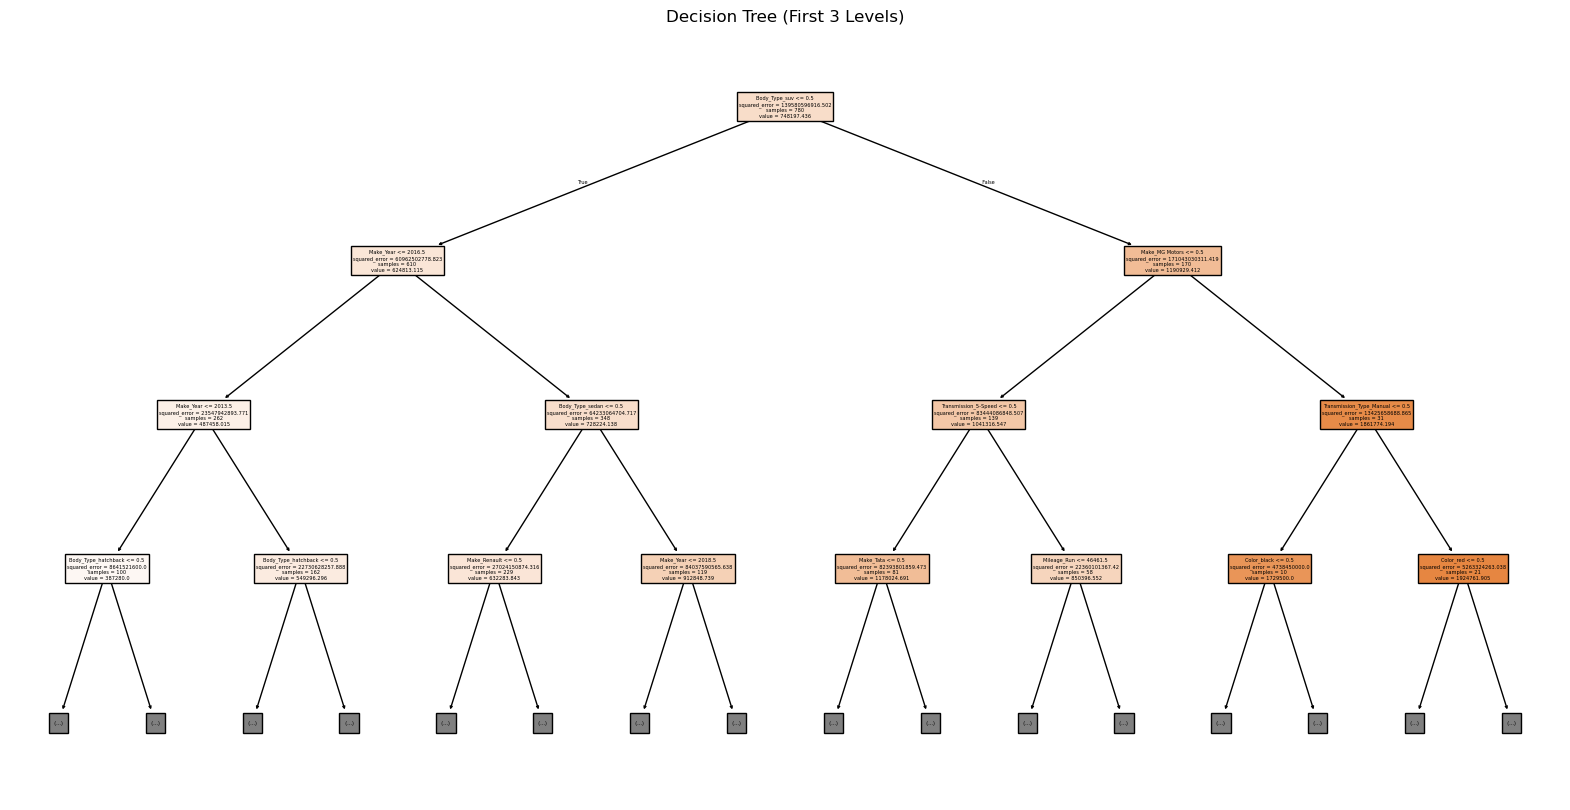

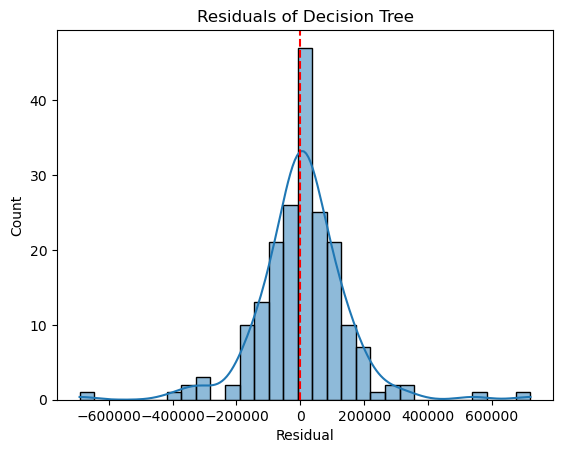

In [ ]:
# Dendrogram
plt.figure(figsize=(20, 10))
plot_tree(tree_model, feature_names=X.columns, filled=True, max_depth=3)
plt.title("Decision Tree (First 3 Levels)")
plt.show()

# Residuals
residuals_tree = y_test - tree_preds
sns.histplot(residuals_tree, kde=True)
plt.axvline(0, color='red', linestyle='--')
plt.title("Residuals of Decision Tree")
plt.xlabel("Residual")
plt.show()

The density of residuals is symmetric and centered around 0


4. Run a linear regression of price on the same variables. Which model -- regression tree or linear regression -- performs better on the test set? Why?


In [10]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_preds = lr_model.predict(X_test)

r2_lr = r2_score(y_test, lr_preds)
rmse_lr = np.sqrt(mean_squared_error(y_test, lr_preds))

print(f"Linear Regression R^2: {r2_lr:.4f}")
print(f"Linear Regression RMSE: {rmse_lr:.2f}")

Linear Regression R^2: 0.8203
Linear Regression RMSE: 143575.20


The regression tree preforms slightly better on the test set than the linear regression does. This is because the tree model makes fewer assumptions about the underlying relationships, and can adapt to the structure and complexity of real-world car pricing data in a way linear models can’t without extra effort.


5. Predict prices using both your tree and your linear model, and make a scatter plot of their values. Describe what you see. 

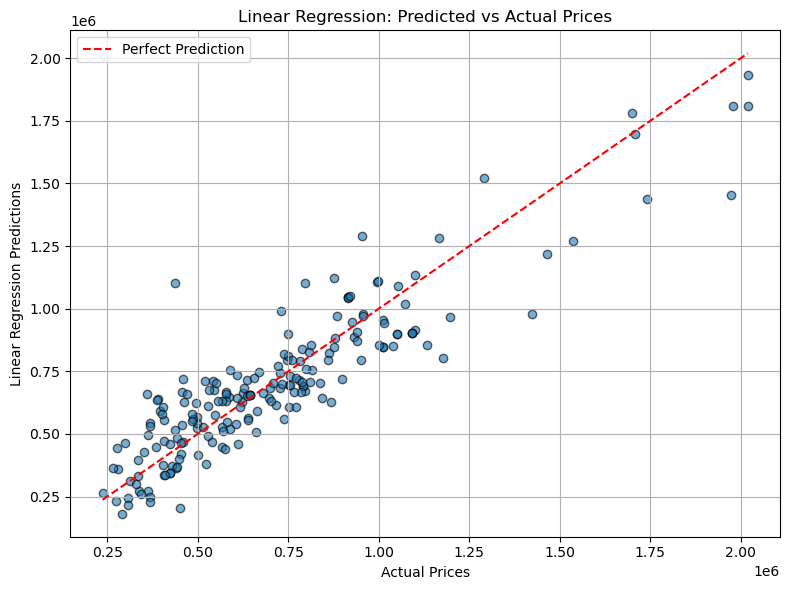

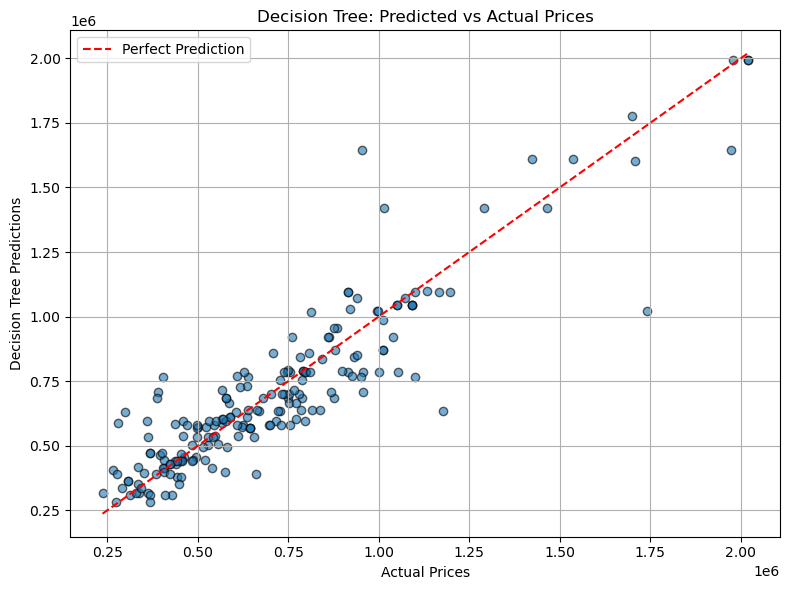

In [ ]:
tree_preds = tree_model.predict(X_test)
lr_preds = lr_model.predict(X_test)

# Linear Regression Predictions vs Actual
plt.figure(figsize=(8, 6))
plt.scatter(y_test, lr_preds, alpha=0.6, edgecolor='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label="Perfect Prediction")
plt.xlabel("Actual Prices")
plt.ylabel("Linear Regression Predictions")
plt.title("Linear Regression: Predicted vs Actual Prices")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Decision Tree Predictions vs Actual
plt.figure(figsize=(8, 6))
plt.scatter(y_test, tree_preds, alpha=0.6, edgecolor='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label="Perfect Prediction")
plt.xlabel("Actual Prices")
plt.ylabel("Decision Tree Predictions")
plt.title("Decision Tree: Predicted vs Actual Prices")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


- The decision tree seems to overfit towards the lower priced cars with more values clusted around the perfect prediction line. There is more variance in the predictive ability for the higher priced cars.
- In the linear regression plot, predictions generally follow the diagonal line, but some points deviate above or below (also with more variance for the higher priced cars)

**Q3.** This is a case study about classification and regression trees.

1. Load the `Breast Cancer METABRIC.csv` dataset. How many observations and variables does it contain? Print out the first few rows of data.


In [14]:
df = pd.read_csv('./data/Breast Cancer METABRIC.csv')
print("Columns:", df.columns.tolist())
print("Shape of dataset:", df.shape)
df.head()

Columns: ['Patient ID', 'Age at Diagnosis', 'Type of Breast Surgery', 'Cancer Type', 'Cancer Type Detailed', 'Cellularity', 'Chemotherapy', 'Pam50 + Claudin-low subtype', 'Cohort', 'ER status measured by IHC', 'ER Status', 'Neoplasm Histologic Grade', 'HER2 status measured by SNP6', 'HER2 Status', 'Tumor Other Histologic Subtype', 'Hormone Therapy', 'Inferred Menopausal State', 'Integrative Cluster', 'Primary Tumor Laterality', 'Lymph nodes examined positive', 'Mutation Count', 'Nottingham prognostic index', 'Oncotree Code', 'Overall Survival (Months)', 'Overall Survival Status', 'PR Status', 'Radio Therapy', 'Relapse Free Status (Months)', 'Relapse Free Status', 'Sex', '3-Gene classifier subtype', 'Tumor Size', 'Tumor Stage', "Patient's Vital Status"]
Shape of dataset: (2509, 34)


,Patient ID,Age at Diagnosis,Type of Breast Surgery,Cancer Type,Cancer Type Detailed,Cellularity,Chemotherapy,Pam50 + Claudin-low subtype,Cohort,ER status measured by IHC,...,Overall Survival Status,PR Status,Radio Therapy,Relapse Free Status (Months),Relapse Free Status,Sex,3-Gene classifier subtype,Tumor Size,Tumor Stage,Patient's Vital Status
0,MB-0000,75.65,Mastectomy,Breast Cancer,Breast Invasive Ductal Carcinoma,NaN,No,claudin-low,1.0,Positve,...,Living,Negative,Yes,138.65,Not Recurred,Female,ER-/HER2-,22.0,2.0,Living
1,MB-0002,43.19,Breast Conserving,Breast Cancer,Breast Invasive Ductal Carcinoma,High,No,LumA,1.0,Positve,...,Living,Positive,Yes,83.52,Not Recurred,Female,ER+/HER2- High Prolif,10.0,1.0,Living
2,MB-0005,48.87,Mastectomy,Breast Cancer,Breast Invasive Ductal Carcinoma,High,Yes,LumB,1.0,Positve,...,Deceased,Positive,No,151.28,Recurred,Female,NaN,15.0,2.0,Died of Disease
3,MB-0006,47.68,Mastectomy,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,Moderate,Yes,LumB,1.0,Positve,...,Living,Positive,Yes,162.76,Not Recurred,Female,NaN,25.0,2.0,Living
4,MB-0008,76.97,Mastectomy,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,High,Yes,LumB,1.0,Positve,...,Deceased,Positive,Yes,18.55,Recurred,Female,ER+/HER2- High Prolif,40.0,2.0,Died of Disease



2.  We'll use a consistent set of feature/explanatory variables. For numeric variables, we'll include `Tumor Size`, `Lymph nodes examined positive`, `Age at Diagnosis`. For categorical variables, we'll include `Tumor Stage`, `Chemotherapy`, and `Cancer Type Detailed`. One-hot-encode the categorical variables and concatenate them with the numeric variables into a feature/covariate matrix, $X$.


In [15]:
from sklearn.preprocessing import OneHotEncoder

numeric_cols = ['Tumor Size', 'Lymph nodes examined positive', 'Age at Diagnosis']
categorical_cols = ['Tumor Stage', 'Chemotherapy', 'Cancer Type Detailed']

df_filtered = df[numeric_cols + categorical_cols + ['Overall Survival Status', 'Overall Survival (Months)']].dropna(subset=numeric_cols + categorical_cols)

X_cat = pd.get_dummies(df_filtered[categorical_cols], drop_first=True)
X_num = df_filtered[numeric_cols]
X = pd.concat([X_num, X_cat], axis=1)
                


3. Let's predict `Overall Survival Status` given the features/covariates $X$. There are 528 missing values, unfortunately: Either drop those rows from your data or add them as a category to predict. Constrain the minimum samples per leaf to 10. Print a dendrogram of the tree. Print a confusion matrix of the algorithm's performance. What is the accuracy? 


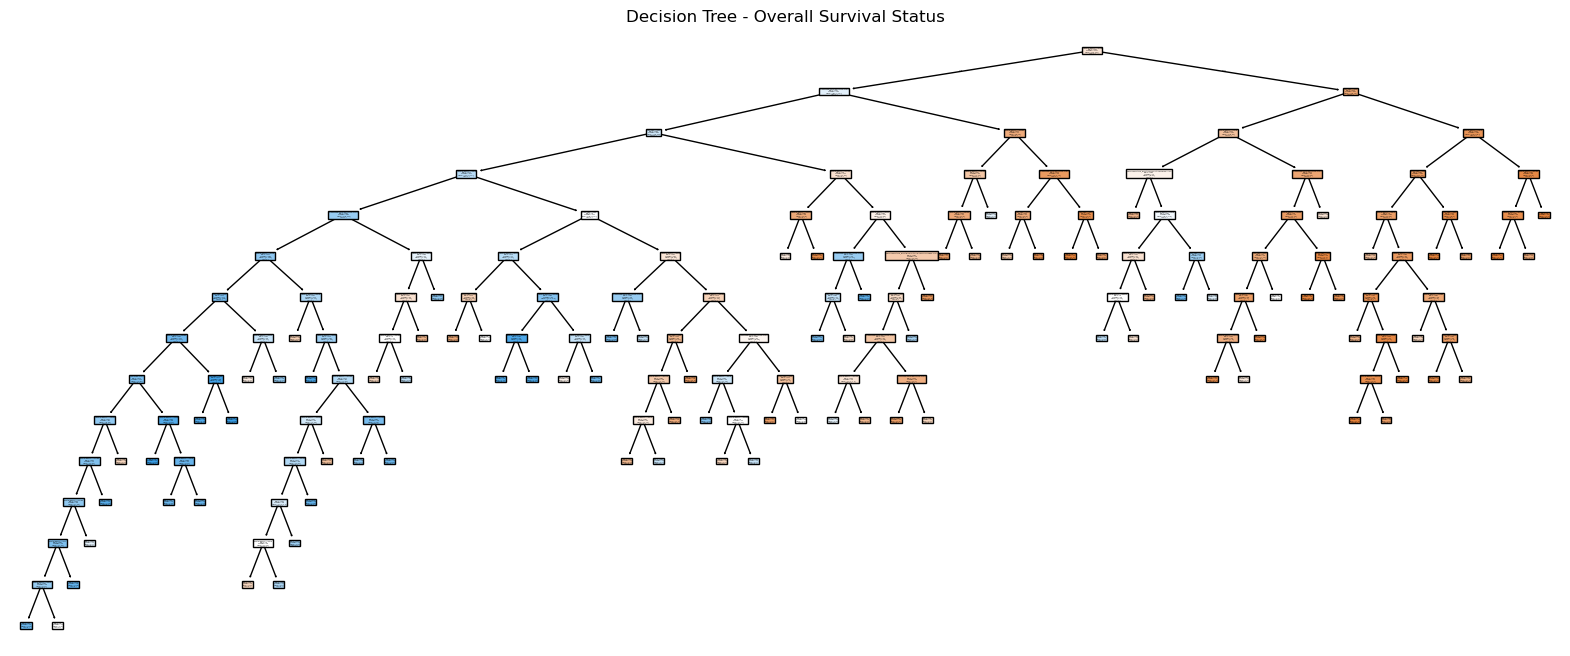

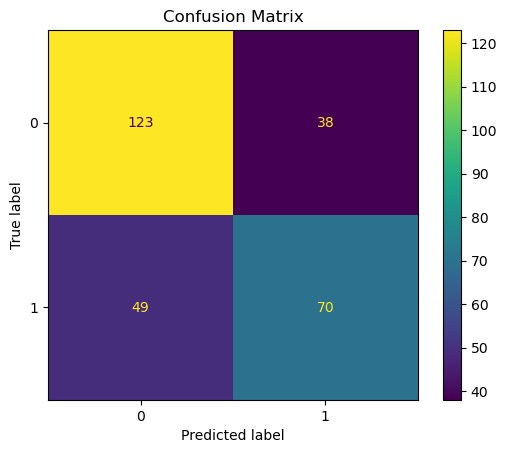

Accuracy: 0.6892857142857143


In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay

y_class = df_filtered['Overall Survival Status']

X_train, X_test, y_train, y_test = train_test_split(X, y_class, test_size=0.2, random_state=42)

clf = DecisionTreeClassifier(min_samples_leaf=10, random_state=42)
clf.fit(X_train, y_train)

plt.figure(figsize=(20, 8))
plot_tree(clf, feature_names=X.columns, class_names=['0', '1'], filled=True)
plt.title("Decision Tree - Overall Survival Status")
plt.show()

y_pred = clf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm).plot()
plt.title("Confusion Matrix")
plt.show()

acc = accuracy_score(y_test, y_pred)
print("Accuracy:", acc)


4. For your model in part three, compute three statistics:
    - The **true positive rate** or **sensitivity**:
        $$
        TPR = \dfrac{TP}{TP+FN}
        $$
    - The **true negative rate** or **specificity**:
        $$
        TNR = \dfrac{TN}{TN+FP}
        $$
    Does your model tend to perform better with respect to one of these metrics?


In [18]:
tn, fp, fn, tp = cm.ravel()

tpr = tp / (tp + fn)
tnr = tn / (tn + fp)

print("True Positive Rate (Sensitivity):", tpr)
print("True Negative Rate (Specificity):", tnr)

if tpr > tnr:
    print("Model is better at detecting positives (sensitive).")
else:
    print("Model is better at detecting negatives (specific).")


True Positive Rate (Sensitivity): 0.5882352941176471
True Negative Rate (Specificity): 0.7639751552795031
Model is better at detecting negatives (specific).



5. Let's predict `Overall Survival (Months)` given the features/covariates $X$. Use the train/test split to pick the optimal `min_samples_leaf` value that gives the highest $R^2$ on the test set (it's about 110). What is the $R^2$? Plot the test values against the predicted values. How do you feel about this model for clinical purposes?

Best min_samples_leaf: 90
R² score: 0.12113431006234965


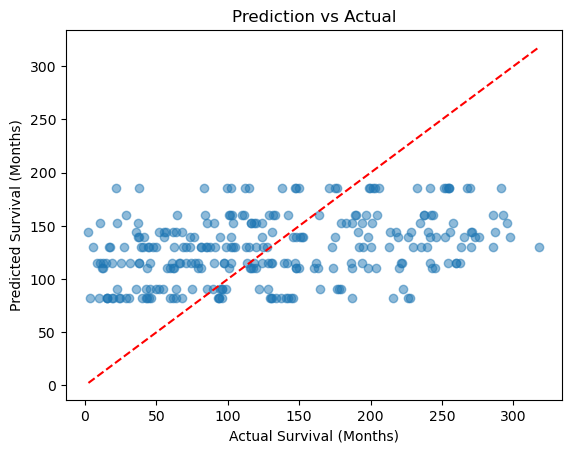

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score

y_reg = df_filtered['Overall Survival (Months)']

X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X, y_reg, test_size=0.2, random_state=42)

best_r2 = -1
best_leaf = 1
for leaf in range(5, 150, 5):
    model = DecisionTreeRegressor(min_samples_leaf=leaf, random_state=42)
    model.fit(X_train_reg, y_train_reg)
    r2 = r2_score(y_test_reg, model.predict(X_test_reg))
    if r2 > best_r2:
        best_r2 = r2
        best_leaf = leaf

final_model = DecisionTreeRegressor(min_samples_leaf=best_leaf, random_state=42)
final_model.fit(X_train_reg, y_train_reg)
y_pred_reg = final_model.predict(X_test_reg)

print("Best min_samples_leaf:", best_leaf)
print("R² score:", r2_score(y_test_reg, y_pred_reg))

plt.scatter(y_test_reg, y_pred_reg, alpha=0.5)
plt.xlabel("Actual Survival (Months)")
plt.ylabel("Predicted Survival (Months)")
plt.title("Prediction vs Actual")
plt.plot([y_test_reg.min(), y_test_reg.max()], [y_test_reg.min(), y_test_reg.max()], 'r--')
plt.show()


This is not ideal for clinical decision-making because patients with very short or very long actual survival are misestimated significantly and overprediction for low-survival patients and underprediction for high-survival patients could lead to misguided care plans.  Additionally, the R-squared value is low, suggesting the model doesn’t explain much variance.

**Q4.** This is a case study about trees using bond rating data. This is a dataset about bond ratings for different companies, alongside a bunch of business statistics and other data. Companies often have multiple reviews at different dates. We want to predict the bond rating (AAA, AA, A, BBB, BB, B, ..., C, D). Do business fundamentals predict the company's rating?

1. Load the `./data/corporate_ratings.csv` dataset. How many observations and variables does it contain? Print out the first few rows of data.

2.  Plot a histogram of the `ratings` variable. It turns out that the gradations of AAA/AA/A and BBB/BB/B and so on make it hard to get good results with trees. Collapse all AAA/AA/A ratings into just A, and similarly for B and C.

3. Use all of the variables **except** Rating, Date, Name, Symbol, and Rating Agency Name. To include Sector, make a dummy/one-hot-encoded representation and include it in your features/covariates. Collect the relevant variables into a data matrix $X$. 

4. Do a train/test split of the data and use a decision tree classifier to predict the bond rating. Including a min_samples_leaf constraint can raise the accuracy and speed up computation time. Print a confusion matrix and the accuracy of your model. How well do you predict the different bond ratings?

5. If you include the rating agency as a feature/covariate/predictor variable, do the results change? How do you interpret this?

**Q5.** This is a case study about detecting fraud using classification trees. The goal is to predict the `class` variable, which is 0 for non-fraud and 1 for fraud.

1. Open `./data/creditcard_fraud.csv`. Print the number of observations and variables, and look at the first few rows of data. The variables are already normalized and de-identified, and are just called things like `V8` to protect the privacy of the clients.

2. Print a table of counts for the `class` variable and make a histogram. What percentage of transactions are fraudulent?

3. Drop `Time` and make a decision tree classifier to predict fraud. Print a confusion table and compute the accuracy. This is a serious **class imbalance** problem: The minority class is so small that essentially predicting 0's for all cases will achieve an extremely high accuracy. There are over-sampling techniques to deal with this issue, but we don't have time to cover them in class.

4. Imagine that you block every transaction in the test set labelled as fraudulent. How much money is (1) saved that should be saved, (2) lost to fraud anyway, (3) withheld in error from customers? Does implementing this anti-fraud system seem like a good idea, or not? Why?

5. Instead of predicting fraud, predict loss: Multiple the `Class` variable times the `Amount` variable, and call it `Loss`. Predict it using a decision tree regressor (making sure to drop Class, Time, and Loss from the features/covariates/predictors). What $R^2$ and RMSE do you get? Make a scatterplot of the predicted values on the test group versus the actual test values. Do you notice any interesting patterns? How could you use this algorithm to decide which transactions to block, and why?


**Q6.** Show that any decision tree is equivalent to a linear regression on a set of dummy variables that represent the optimal splits in the tree. 

Hint: You can think of CART as partitioning the feature space into a set of sets $\{S_1, S_2, ..., S_K\}$, and then predicting the average for all of the observations in each set $S_k$, $m_k$:
$$
\hat{y}(x) = \sum_{k=1}^K \mathbb{I}\{ x \text{ is in } S_k \} m_k
$$
where $\mathbb{I} \{ P(x,k)\}$ takes the value 1 if the proposition $P(x,k)$ is true and 0 otherwise. Now, doesn't that look like least-squares regression on a set of dummy/one-hot-encoded variables?

Conversely, can any linear regression be represented by a tree?